In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
import torch

In [4]:
torch.__version__

'1.10.0'

In [5]:
torch.cuda.is_available()

True

In [6]:
x = torch.arange(12)

In [7]:
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
x.shape

torch.Size([12])

In [9]:
x.numel()

12

In [10]:
X = x.reshape(3, 4)

In [11]:
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [12]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [13]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [14]:
torch.randn(3, 4)

tensor([[ 1.4813, -0.0997,  0.5482,  1.1956],
        [-0.9307,  1.5338,  0.5303, -1.0724],
        [-0.5784,  2.1445,  0.5713, -1.0486]])

In [15]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [16]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [17]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [18]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [19]:
X ==  Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [20]:
X.sum()

tensor(66.)

In [21]:
X.sum(axis=0)

tensor([12., 15., 18., 21.])

In [22]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [23]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [24]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [25]:
X[1: 3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [26]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
X[1, 2] = 9

In [28]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [29]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [30]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [31]:
Z = torch.zeros_like(Y)
print(id(Z))
Z[:] = X + Y
print(id(Z))

2071708946656
2071708946656


In [32]:
before = id(X)
X += Y
id(X) == before

True

In [33]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [34]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [35]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [36]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [37]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


C:\Users\71483\AppData\Local\Temp/ipykernel_13608/38268100.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [38]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [39]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [40]:
data
def drop_max_na(m):
    return m.drop(m.isna().sum().idxmax(), axis=1)

In [41]:
data = drop_max_na(data)
data

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


In [42]:
data.count()

NumRooms    2
Price       4
dtype: int64

In [43]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [44]:
x.shape

torch.Size([])

In [45]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [46]:
x[3]

tensor(3)

In [47]:
len(x)

4

In [48]:
x.shape

torch.Size([4])

In [49]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [50]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [51]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [52]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [53]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [54]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [55]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [56]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [57]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [58]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [59]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [60]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [61]:
A.sum(axis=[0, 1])

tensor(190.)

In [62]:
A.mean(), A.sum() / A.mean()

(tensor(9.5000), tensor(20.))

In [63]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [64]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [65]:
A / sum_A # sum_A 广播

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [66]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [67]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [68]:
torch.sum(x * y)

tensor(6.)

In [69]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [70]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [71]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [72]:
torch.abs(u).sum()

tensor(7.)

In [73]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

In [74]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [75]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [76]:
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [77]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

In [78]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [79]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [80]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear',
        fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # 如果 X 有一个轴，输出 True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
        
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
        
    if len(X) != len(Y):
        X = X * len(Y)
        
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

C:\Users\71483\AppData\Local\Temp/ipykernel_13608/2572604423.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


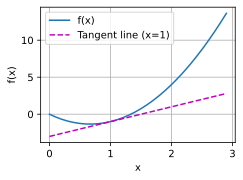

In [81]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [82]:
[f(x), 2 * x - 3]

[array([ 0.  , -0.37, -0.68, -0.93, -1.12, -1.25, -1.32, -1.33, -1.28,
        -1.17, -1.  , -0.77, -0.48, -0.13,  0.28,  0.75,  1.28,  1.87,
         2.52,  3.23,  4.  ,  4.83,  5.72,  6.67,  7.68,  8.75,  9.88,
        11.07, 12.32, 13.63]),
 array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
        -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
         1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8])]

In [83]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [84]:
x.requires_grad_(True)
x.grad

In [85]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [86]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [87]:
x.grad == 4 * x

tensor([True, True, True, True])

In [88]:
# 在默认情况下，PyTorch 会累积梯度，我们需要清除之前的值
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [89]:
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [90]:
x.grad.zero_()
y = x * x
# 一个向量是不进行backward操作的，而sum（）后，由于梯度为1，所以对结果不产生影响。反向传播算法一定要是一个标量才能进行计算。
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [91]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad, u

(tensor([0., 1., 4., 9.]), tensor([0., 1., 4., 9.]))

In [92]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [93]:
x.grad.zero_()
y = x * x
z = y * x
z.sum().backward()
x.grad

tensor([ 0.,  3., 12., 27.])

In [94]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [95]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [96]:
a.grad == d / a

tensor(True)

In [97]:
a = torch.randn(size=(3, 4), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

C:\Users\71483\AppData\Local\Temp/ipykernel_13608/2572604423.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


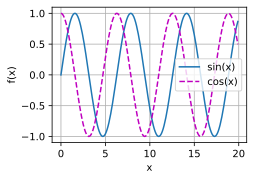

In [98]:
x = torch.arange(0, 20, 0.1)
x.requires_grad_(True)
y = torch.sin(x)
y.sum().backward()
plot(x.detach(), [y.detach(), x.grad], 'x', 'f(x)', legend=['sin(x)', 'cos(x)'])

In [99]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [100]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 1., 1., 3., 1.])

In [101]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1610, 0.1840, 0.1530, 0.1660, 0.1550, 0.1810])

In [106]:
counts = multinomial.Multinomial(10, fair_probs).sample((5000,))
cum_counts = counts.cumsum(dim=0)

In [107]:
cum_counts

tensor([[0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00],
        [3.0000e+00, 5.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00],
        [5.0000e+00, 9.0000e+00, 6.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00],
        ...,
        [8.2420e+03, 8.3830e+03, 8.3610e+03, 8.4580e+03, 8.2220e+03, 8.3140e+03],
        [8.2440e+03, 8.3850e+03, 8.3610e+03, 8.4620e+03, 8.2220e+03, 8.3160e+03],
        [8.2460e+03, 8.3880e+03, 8.3630e+03, 8.4640e+03, 8.2230e+03, 8.3160e+03]])

D:\anaconda\anaconda\envs\d2l\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\anaconda\envs\d2l\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\anaconda\envs\d2l\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\anaconda\envs\d2l\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\anaconda\envs\d2l\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\anaconda\envs\d2l\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning

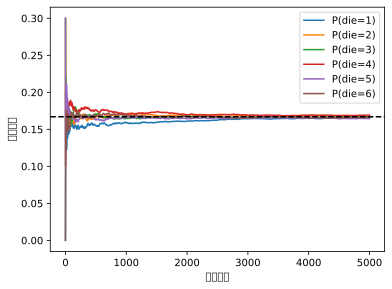

In [108]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
    
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('试验次数')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend()

In [105]:
estimates

tensor([[0.0000, 0.3000, 0.2000, 0.1000, 0.3000, 0.1000],
        [0.0500, 0.3500, 0.2000, 0.0500, 0.2000, 0.1500],
        [0.0667, 0.2333, 0.2333, 0.2000, 0.1333, 0.1333],
        ...,
        [0.1645, 0.1709, 0.1612, 0.1735, 0.1653, 0.1647],
        [0.1643, 0.1705, 0.1615, 0.1731, 0.1657, 0.1647],
        [0.1644, 0.1704, 0.1618, 0.1730, 0.1656, 0.1648]])

In [109]:
dir(torch.distributions)

['AbsTransform',
 'AffineTransform',
 'Bernoulli',
 'Beta',
 'Binomial',
 'CatTransform',
 'Categorical',
 'Cauchy',
 'Chi2',
 'ComposeTransform',
 'ContinuousBernoulli',
 'CorrCholeskyTransform',
 'Dirichlet',
 'Distribution',
 'ExpTransform',
 'Exponential',
 'ExponentialFamily',
 'FisherSnedecor',
 'Gamma',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfNormal',
 'Independent',
 'IndependentTransform',
 'Kumaraswamy',
 'LKJCholesky',
 'Laplace',
 'LogNormal',
 'LogisticNormal',
 'LowRankMultivariateNormal',
 'LowerCholeskyTransform',
 'MixtureSameFamily',
 'Multinomial',
 'MultivariateNormal',
 'NegativeBinomial',
 'Normal',
 'OneHotCategorical',
 'OneHotCategoricalStraightThrough',
 'Pareto',
 'Poisson',
 'PowerTransform',
 'RelaxedBernoulli',
 'RelaxedOneHotCategorical',
 'ReshapeTransform',
 'SigmoidTransform',
 'SoftmaxTransform',
 'StackTransform',
 'StickBreakingTransform',
 'StudentT',
 'TanhTransform',
 'Transform',
 'TransformedDistribution',
 'Uniform',
 'VonMises',
 'Weibu

In [110]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur